# **1. Business Understanding / Бизнес-анализ: описание кейса**

![](https://dslv9ilpbe7p1.cloudfront.net/xT52zCgGPZgs3-IqJrAhzA_store_banner_image.jpeg)


К нам обратился владелец небольшой сети кофеен, который планирует расширить
свой бизнес и открыть несколько новых точек в течение ближайших 4 месяцев. В
связи с этим он хотел бы понять, как распределяются продажи по существующей
сети кофеен, какие виды продукции вносят наибольший вклад в объем продаж, а
от каких, возможно, стоит отказаться, кто является основным клиентом сети.
Заказчиком были предоставлены датасеты с выгрузкой о транзакциях и клиентах
из его CRM-системы.
Проанализируйте полученные данные и представьте аналитический отчет,
содержащий выводы и рекомендации для Заказчика, которые помогут ему для
решения его бизнес-задач.


**Наша задача** — изучить продажи в разрезе категорий и типов продукции, изучить группы товаров с наилучшими и наихудшими показателями выручки, выявить кофейни с наибольшим влиянием на общий объем продаж



Какая **информация важна** для нашего коллеги-маркетолога:
1. идентификатор транзакции (transaction_id)
2. идентификатор товара (product_id)
3. наименование товара (product_name)
4. категория товара (product_category)
5. тип товара (product_type)
6. идентификатор кофейни (sales_outlet_id)
7. город расположения кофейни (store_city)
8. общая сумма чека (total)


Основные пункты проработанного дизайна исследования представлены в **карточке проекта**.

# **2. Data Understanding / Изучение данных**

## 2.1. Импорт библиотек

In [ ]:
# из библиотеки google.colab импортируем класс files при необходимости подгрузки файла с персонального компьютера
from google.colab import files
# импортируем pandas - основную библиотеку аналитика данных
import pandas as pd
# импортируем модуль pyplot из библиотеки matplotlib для визуализации
from matplotlib import pyplot as plt
# импортируем библиотеку seaborn для визуализации
import seaborn as sns
# import plotly.express as px
from matplotlib.ticker import FormatStrFormatter

## 2.2. Подгрузка файла

Подгрузка файла в среду выполнения кода Colab с персонального компьютера

In [ ]:
uploaded = files.upload()

Saving coffee_shop_easy.xlsx to coffee_shop_easy (1).xlsx


## 2.3. Чтение файла

In [ ]:
df = pd.read_excel('coffee_shop_easy.xlsx')

## 2.4. Обзор датасета

In [ ]:
df.head()

transaction_id  product_id                 product_name product_category  \
0               0          52    Traditional Blend Chai Rg              Tea   
1               1          27                 Brazilian Lg           Coffee   
2               2          46        Serenity Green Tea Rg              Tea   
3               3          23  Our Old Time Diner Blend Rg           Coffee   
4               4          34     Jamaican Coffee River Sm           Coffee   

            product_type  sales_outlet_id       store_city   total  
0        Brewed Chai tea                3  Санкт-Петербург  162.50  
1  Organic brewed coffee                3  Санкт-Петербург  455.00  
2       Brewed Green tea                3  Санкт-Петербург  325.00  
3            Drip coffee                3  Санкт-Петербург  325.00  
4  Premium brewed coffee                3  Санкт-Петербург  159.25

In [ ]:
df.shape

(24852, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24852 entries, 0 to 24851
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    24852 non-null  int64  
 1   product_id        24852 non-null  int64  
 2   product_name      24852 non-null  object 
 3   product_category  24852 non-null  object 
 4   product_type      24852 non-null  object 
 5   sales_outlet_id   24852 non-null  int64  
 6   store_city        24852 non-null  object 
 7   total             24852 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.5+ MB


## 2.5. Выявление проблем

В предоставленном датасете проблемы необходимые для предобработки данных не выявлены. Дубликатов, пропусков нет, вложенные и нераспакованные структуры отсутствуют, форматы всех признаков соответсвуют необходимым значениям.

## 2.6. Выводы по разделу

1. Был представлен датасет с данными о транзакциях и клиентах сети кофеен: файл в формате xlsx, содержащий 24852 строк (объектов) и 8 столбцов (признаков).
2. Датасет в предобработке не нуждается.


# **3. Modeling / Анализ данных**



**Этапы анализа:**
1. Определить целевые переменные.
2. Определить типы переменных.
3. Проанализировать каждый признак отдельно.

**Аналитические цели:**
1. изучить продажи в разрезе категорий и типов продукции
2. изучить группы товаров с наилучшими и наихудшими показателями выручки
3. выявить кофейни с наибольшим влиянием на общий объем продаж


**Целевые переменные:**
* 'total'
* 'product_category'
* 'sales_outlet_id'

**Типы переменных:**
1. Категориальные:
  * 'product_name' - наименование товара
  * 'product_category' - категория товара
  * 'product_type' - тип товара
  * 'store_city' - город расположения кофейни
  * 'sales_outlet_id' - идентификатор кофейни
2. Количественные:
  * 'total' - общая сумма чека


## 3.1. Количественные признаки

In [ ]:
df_copy = df.copy()

In [ ]:
# обзор датасета
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24852 entries, 0 to 24851
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    24852 non-null  int64  
 1   product_id        24852 non-null  int64  
 2   product_name      24852 non-null  object 
 3   product_category  24852 non-null  object 
 4   product_type      24852 non-null  object 
 5   sales_outlet_id   24852 non-null  int64  
 6   store_city        24852 non-null  object 
 7   total             24852 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.5+ MB


In [ ]:
df_copy.select_dtypes(exclude=[object, bool, 'datetime']).columns

Index(['transaction_id', 'product_id', 'sales_outlet_id', 'total'], dtype='object')

In [ ]:
# признаки с содержанием 'id' являются уникальными идентификаторами транзакции, продукта
# поэтому в процессе анализа не рассматривается

### total

In [ ]:
total = df_copy.total

In [ ]:
max_value = total.max()
min_value = total.min()
mean_value = total.mean()
median_value = total.median()
print(f'Наибольший общий чек: {max_value}', f'Наименьший общий чек: {min_value}',
     f'Среднее значение общего чека: {mean_value}', f'Медианное значение общего чека: {median_value}', sep='\n')

Наибольший общий чек: 23400.0
Наименьший общий чек: 52.0
Среднее значение общего чека: 299.6138017061001
Медианное значение общего чека: 243.75


In [ ]:
percentile_10_value = total.quantile(0.10)
percentile_25_value = total.quantile(0.25)
percentile_50_value = total.quantile(0.50)
percentile_75_value = total.quantile(0.75)
percentile_90_value = total.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 162.5
25-й процентиль: 195.0
50-й процентиль: 243.75
75-й процентиль: 390.0
90-й процентиль: 487.5


In [ ]:
total.describe()

count    24852.000000
mean       299.613802
std        230.478316
min         52.000000
25%        195.000000
50%        243.750000
75%        390.000000
max      23400.000000
Name: total, dtype: float64

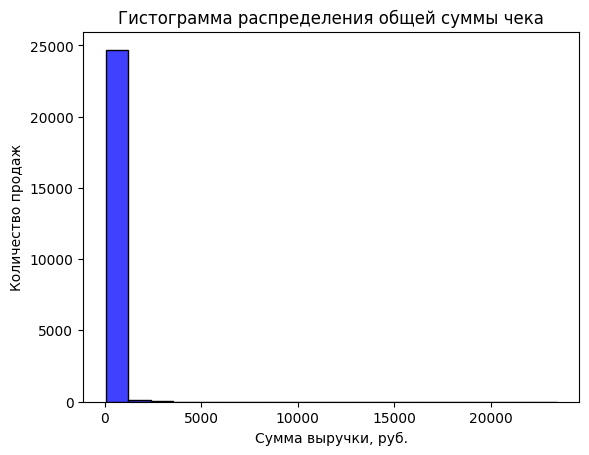

In [ ]:
sns.histplot(total, bins=20, color='blue')
plt.title('Гистограмма распределения общей суммы чека')
plt.xlabel('Сумма выручки, руб.')
plt.ylabel('Количество продаж')
plt.show()

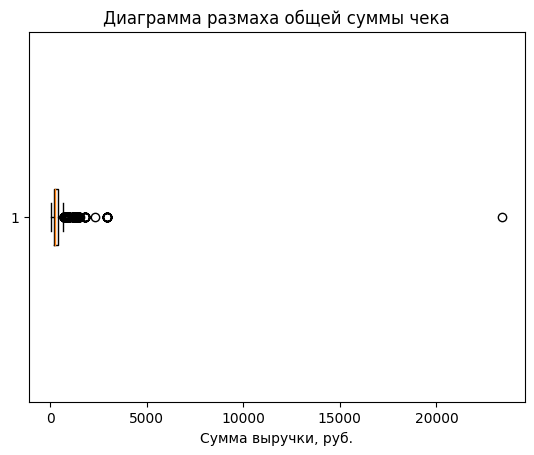

In [ ]:
plt.boxplot(total, vert=False)
plt.title('Диаграмма размаха общей суммы чека')
plt.xlabel('Сумма выручки, руб.')
plt.show()

In [ ]:
# из графиков видно, что есть аномальные значения, рассмотрим графики без них

In [ ]:
# количество чеков, значения выручки по которым превышает 90 процентиль
len(df_copy[df_copy.total>percentile_90_value])

1886

In [ ]:
# посмотрим на значение 99 процентиля
total.quantile(0.99)

910.0

In [ ]:
# количество чеков, значения выручки по которым превышает 99 процентиль
len(df_copy[df_copy.total>total.quantile(0.99)])

232

In [ ]:
# рассмотрим транзакции, значения выручки по которым превышает 99 процентиль
df_copy[df_copy.total>total.quantile(0.99)].sort_values(by='total', ascending=False)

transaction_id  product_id                  product_name  \
17743           28980           8                     Civet Cat   
18912           33424           8                     Civet Cat   
20098           37149           8                     Civet Cat   
11678           13722           8                     Civet Cat   
19796           35975           8                     Civet Cat   
...               ...         ...                           ...   
20742           39097          61  Sustainably Grown Organic Lg   
16719           24637          61  Sustainably Grown Organic Lg   
22442           44209          61  Sustainably Grown Organic Lg   
19078           33900          61  Sustainably Grown Organic Lg   
19598           35298          61  Sustainably Grown Organic Lg   

         product_category   product_type  sales_outlet_id       store_city  \
17743        Coffee beans  Premium Beans                8           Москва   
18912        Coffee beans  Premium Beans                3  Санкт-Петербург   
20098        Coffee beans  Premium Beans                5           Москва   
11678        Coffee beans  Premium Beans                3  Санкт-Петербург   
19796        Coffee beans  Premium Beans                8           Москва   
...                   ...            ...              ...              ...   
20742  Drinking Chocolate  Hot chocolate                5           Москва   
16719  Drinking Chocolate  Hot chocolate                5           Москва   
22442  Drinking Chocolate  Hot chocolate                5           Москва   
19078  Drinking Chocolate  Hot chocolate                5           Москва   
19598  Drinking Chocolate  Hot chocolate                5           Москва   

          total  
17743  23400.00  
18912   2925.00  
20098   2925.00  
11678   2925.00  
19796   2925.00  
...         ...  
20742    926.25  
16719    926.25  
22442    926.25  
19078    926.25  
19598    926.25  

[232 rows x 8 columns]

In [ ]:
# исключим данные наблюдения из датасета для графического анализа общей суммы чека
df_copy_total_quant_99 = df_copy[df_copy.total<=total.quantile(0.99)]
df_copy_total_quant_99.shape

(24620, 8)

In [ ]:
total_from_quant_99 = df_copy_total_quant_99.total
total_from_quant_99.describe()

count    24620.000000
mean       287.836950
std        128.755455
min         52.000000
25%        195.000000
50%        243.750000
75%        390.000000
max        910.000000
Name: total, dtype: float64

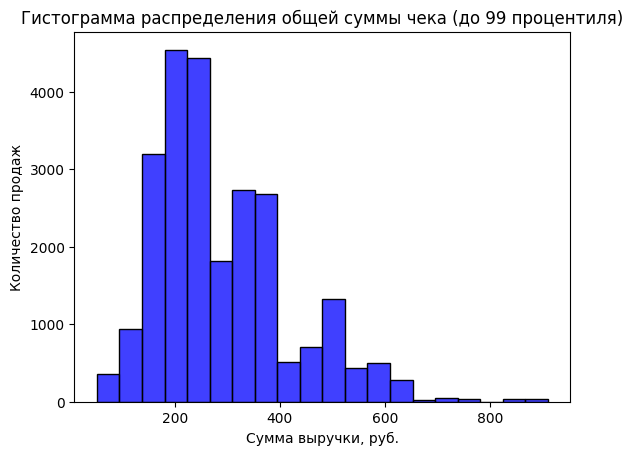

In [ ]:
sns.histplot(total_from_quant_99, bins=20, color='blue')
plt.title('Гистограмма распределения общей суммы чека (до 99 процентиля)')
plt.xlabel('Сумма выручки, руб.')
plt.ylabel('Количество продаж')
plt.show()

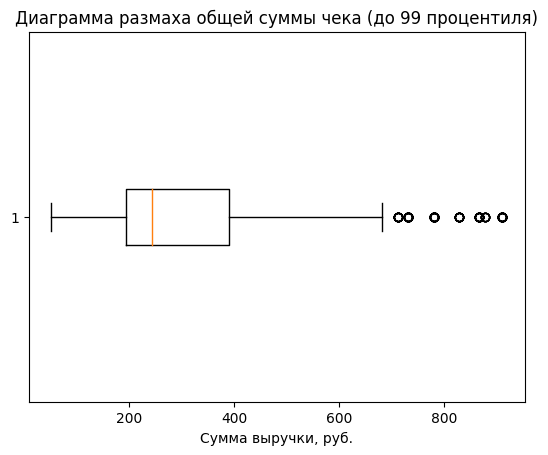

In [ ]:
plt.boxplot(total_from_quant_99, vert=False)
plt.title('Диаграмма размаха общей суммы чека (до 99 процентиля)')
plt.xlabel('Сумма выручки, руб.')
plt.show()

**Выводы:**
1. Минимальное значение общей суммы чека в исходной выборке - 52,0 руб, максимальное - 23 400,00 руб. Размах значений составил 23 348,00 руб. В процессе анализа данных было выявлено наличие выбросов - небольшое количество чеков, с общей суммой более 910,00 руб (это значение соответсвует 99му процентилю). Таких чеков 232шт. После корректировки максимальное значение общей суммы чека составило 910,00 руб., и размах составил 858,00 руб.
2. После исключения для графического анализа некоторых выбросов среднее значение составило 287,84 руб., а медианное - 243,75 руб.
3. Общая сумма чека 25% покупателей не превышает 195,00 руб., а 75% клиентов - 390,00 руб. Это означает, что половину транзакций находится в этих пределах
4. На гистограмме видно, чаще всего встречаются чеки с общей суммой в интервале от 130,00 до 260,00 руб. После 600,00 руб количество чеков минимальное.


## 3.2. Категориальные признаки

In [ ]:
# так как нам необходимо провести анализ объема продаж в разрезе кофеен
# переведем тип данных идентификатоа кофеен и строковый из целого
df_copy.sales_outlet_id = df_copy.sales_outlet_id.astype('object')


In [ ]:
df_copy.select_dtypes(include=[object]).columns

Index(['product_name', 'product_category', 'product_type', 'sales_outlet_id',
       'store_city'],
      dtype='object')

### product_name

In [ ]:
product_name = df_copy.product_name
product_name.describe()

count                       24852
unique                         80
top       Morning Sunrise Chai Rg
freq                          521
Name: product_name, dtype: object

In [ ]:
product_name.mode()

0    Morning Sunrise Chai Rg
Name: product_name, dtype: object

In [ ]:
product_name.value_counts().sort_values(ascending=False)

product_name
Morning Sunrise Chai Rg         521
Columbian Medium Roast Rg       516
Sustainably Grown Organic Lg    516
Latte                           516
Traditional Blend Chai Rg       515
                               ... 
Chili Mayan                      17
Espresso Roast                   17
Earl Grey                        15
Peppermint                       14
Spicy Eye Opener Chai            13
Name: count, Length: 80, dtype: int64

In [ ]:
product_name_top_10 = product_name.value_counts()[:10]
product_name_top_10

product_name
Morning Sunrise Chai Rg         521
Columbian Medium Roast Rg       516
Sustainably Grown Organic Lg    516
Latte                           516
Traditional Blend Chai Rg       515
Brazilian Sm                    515
Our Old Time Diner Blend Sm     515
English Breakfast Lg            509
Spicy Eye Opener Chai Lg        507
Serenity Green Tea Rg           506
Name: count, dtype: int64

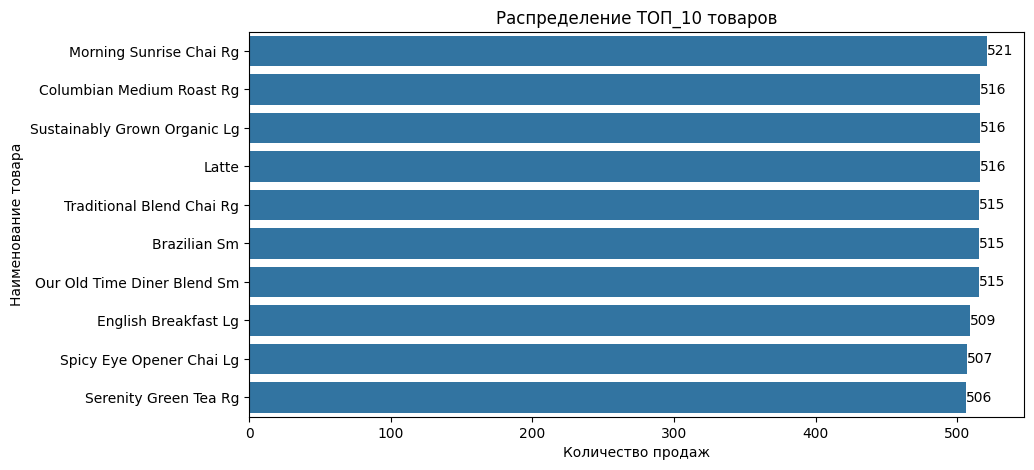

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=product_name_top_10.values, y=product_name_top_10.index)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение ТОП_10 товаров')
plt.ylabel('Наименование товара')
plt.xlabel('Количество продаж')
plt.show()

**Выводы:**
1. В датасете по признаку наименования товара уникальных значений 80 шт.
2. Наиболее встречающееся значений признака - наименование "Morning Sunrise Chai Rg", встретилось 521 раз
3. Наиболее встречаемые товары: Morning Sunrise Chai Rg, Columbian Medium Roast Rg, Sustainably Grown Organic Lg, Latte, Traditional Blend Chai Rg. Наименее встречаемые: Chili Mayan, Espresso Roast, Earl Grey, Peppermint, Spicy Eye Opener Chai.
4. Согласно графическому анализу в Топ-10 наименований попали товары с частотой появление в чеках от 506 до 521 шт.

### product_category

In [ ]:
product_category = df_copy.product_category
product_category.describe()

count      24852
unique         9
top       Coffee
freq        9948
Name: product_category, dtype: object

In [ ]:
product_category.mode()

0    Coffee
Name: product_category, dtype: object

In [ ]:
product_category.value_counts()

product_category
Coffee                9948
Tea                   7866
Bakery                3780
Drinking Chocolate    1955
Flavours               782
Coffee beans           217
Loose Tea              155
Branded                 82
Packaged Chocolate      67
Name: count, dtype: int64

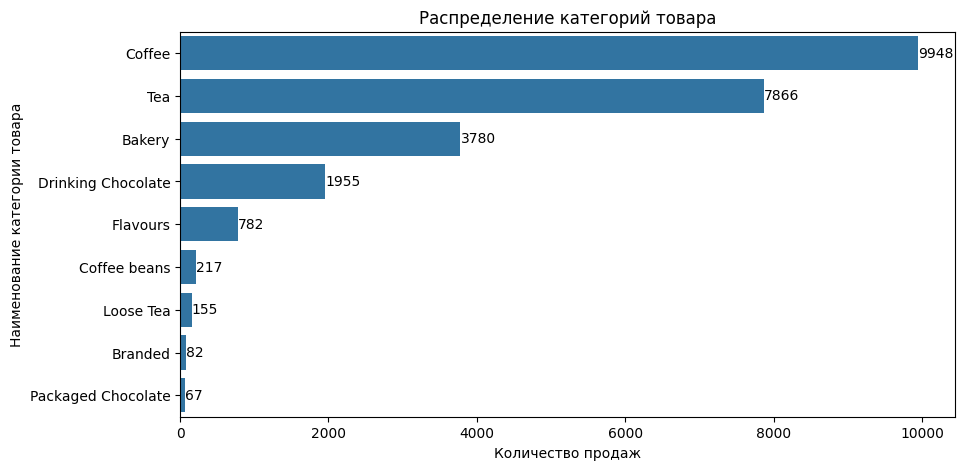

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=product_category.value_counts().values, y=product_category.value_counts().index)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение категорий товара')
plt.ylabel('Наименование категории товара')
plt.xlabel('Количество продаж')
plt.show()

In [ ]:
df_copy.groupby('product_category')['total'].describe()


count         mean          std     min     25%      50%  \
product_category                                                                
Bakery              3780.0   235.255635    40.558315  172.25  211.25   227.50   
Branded               82.0  1177.926829   445.019039  780.00  780.00   910.00   
Coffee              9948.0   297.783700   125.226080  130.00  195.00   276.25   
Coffee beans         217.0  1454.816820  1604.879970  650.00  975.00  1283.75   
Drinking Chocolate  1955.0   407.347187   151.097110  227.50  292.50   308.75   
Flavours             782.0    81.989770    29.939245   52.00   52.00   104.00   
Loose Tea            155.0   599.908065    36.229842  581.75  581.75   581.75   
Packaged Chocolate    67.0   564.054478   180.788502  416.00  416.00   494.00   
Tea                 7866.0   278.520372   105.427702  162.50  195.00   325.00   

                         75%       max  
product_category                        
Bakery               243.750    585.00  
Branded             1820.000   1820.00  
Coffee               390.000    828.75  
Coffee beans        1365.000  23400.00  
Drinking Chocolate   585.000    926.25  
Flavours             104.000    208.00  
Loose Tea            601.250    711.75  
Packaged Chocolate   680.225    866.45  
Tea                  390.000    780.00

In [ ]:
product_category_total = df_copy.groupby('product_category')['total'].sum().sort_values(ascending=False)
product_category_total

product_category
Coffee                2962352.25
Tea                   2190841.25
Bakery                 889266.30
Drinking Chocolate     796363.75
Coffee beans           315695.25
Branded                 96590.00
Loose Tea               92985.75
Flavours                64116.00
Packaged Chocolate      37791.65
Name: total, dtype: float64

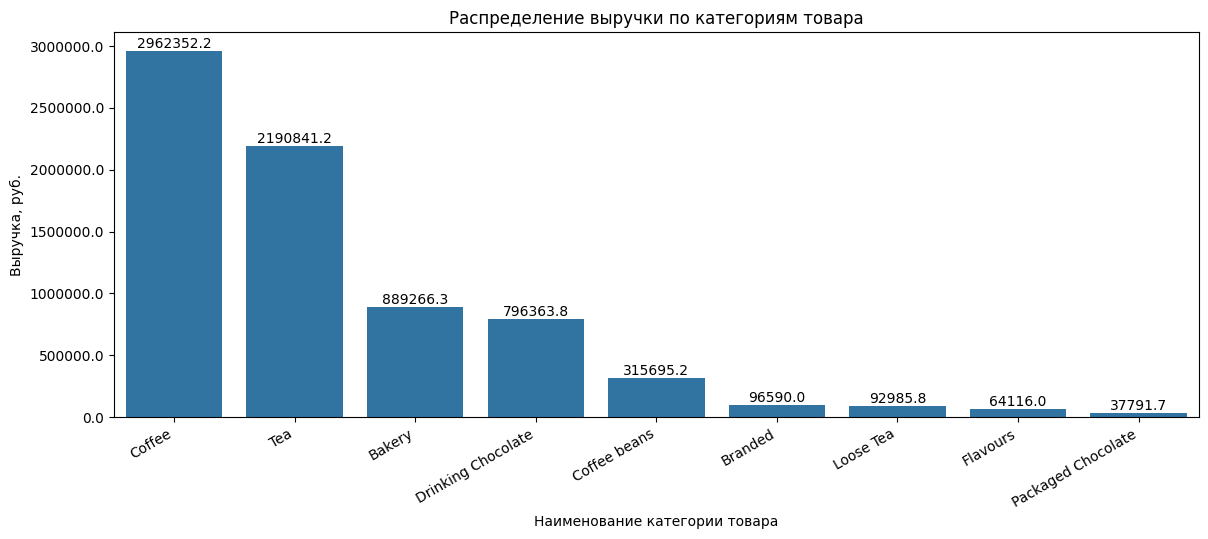

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))
ax = sns.barplot(y=product_category_total.values, x=product_category_total.index)
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.1f' )
plt.title('Распределение выручки по категориям товара')
plt.xlabel('Наименование категории товара')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel('Выручка, руб.')
plt.xticks(rotation=30, ha='right')
plt.show()

**Выводы:**
1. В датасете по признаку категория товара уникальных значений 9 шт.
2. Наиболее встречающееся значений признака -  "Coffee", встретилось 9948 раз.
3. Наиболее встречаемые категории товара: Coffee, Tea, Bakery, Drinking Chocolate, Flavours. Наименее встречаемые: Coffee beans, Loose Tea, Branded, Packaged Chocolate.
4. Что касается размеров выручки в разрезе категорий товаров, можно сказать следующее:
* самый большой вклад в выручку приносит категория Coffee - 2 962 352 руб.
* чуть меньше приносит продажа категории Tea - 2 190 841 руб.
* самый наихудший показатель выручки в категории Packaged Chocolate - 37 792 руб.


### product_type

In [ ]:
product_type = df_copy.product_type
product_type.describe()

count               24852
unique                 29
top       Brewed Chai tea
freq                 2990
Name: product_type, dtype: object

In [ ]:
product_type.mode()

0    Brewed Chai tea
Name: product_type, dtype: object

In [ ]:
product_type.value_counts()

product_type
Brewed Chai tea          2990
Gourmet brewed coffee    2859
Barista Espresso         2765
Brewed Black tea         1967
Hot chocolate            1955
Brewed herbal tea        1910
Scone                    1703
Organic brewed coffee    1483
Drip coffee              1463
Premium brewed coffee    1378
Pastry                   1132
Brewed Green tea          999
Biscotti                  945
Regular syrup             561
Sugar free syrup          221
Housewares                 57
Chai tea                   55
Organic Beans              52
Premium Beans              47
Black tea                  42
Gourmet Beans              42
Drinking Chocolate         38
Herbal tea                 37
Espresso Beans             35
Organic Chocolate          29
Clothing                   25
House blend Beans          23
Green tea                  21
Green beans                18
Name: count, dtype: int64

In [ ]:
product_type.value_counts()[:10]

product_type
Brewed Chai tea          2990
Gourmet brewed coffee    2859
Barista Espresso         2765
Brewed Black tea         1967
Hot chocolate            1955
Brewed herbal tea        1910
Scone                    1703
Organic brewed coffee    1483
Drip coffee              1463
Premium brewed coffee    1378
Name: count, dtype: int64

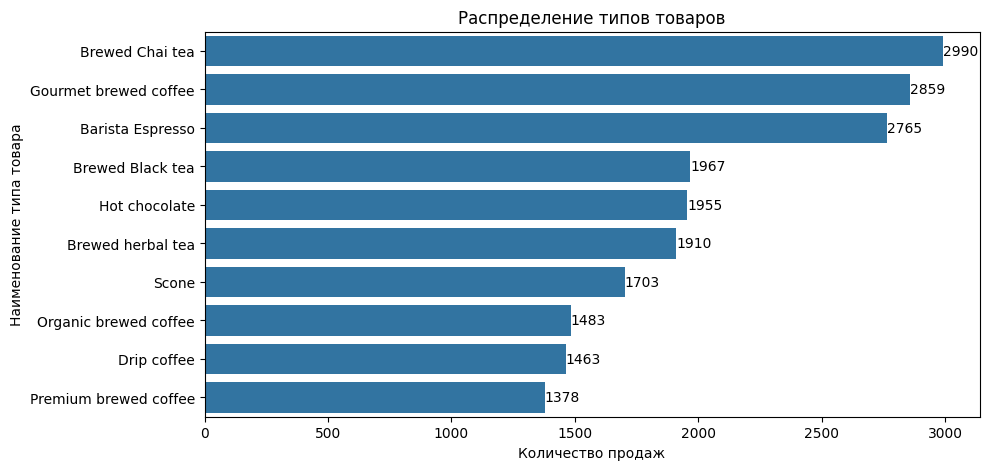

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(y=product_type.value_counts().index[:10], x=product_type.value_counts().values[:10])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение типов товаров')
plt.ylabel('Наименование типа товара')
plt.xlabel('Количество продаж')
plt.show()

**Выводы:**
1. Количество уникальных значений по признаку тип товара составляет 29 шт.
2. В Топ-10 входят такие типы Brewed Chai tea, Gourmet brewed coffee, Barista Espresso, Brewed Black tea, Hot chocolate, Brewed herbal tea, Scone, Organic brewed coffee, Drip coffee, Premium brewed coffee.
3. Согласно графическому анализу в Топ-10 типов попали товары с количеством чеков, в которых они появлялись от 1378 до 2990 шт.


### store_city

In [ ]:
store_city = df_copy.store_city
store_city.describe()

count      24852
unique         2
top       Москва
freq       16259
Name: store_city, dtype: object

In [ ]:
store_city.mode()

0    Москва
Name: store_city, dtype: object

In [ ]:
store_city.value_counts()

store_city
Москва             16259
Санкт-Петербург     8593
Name: count, dtype: int64

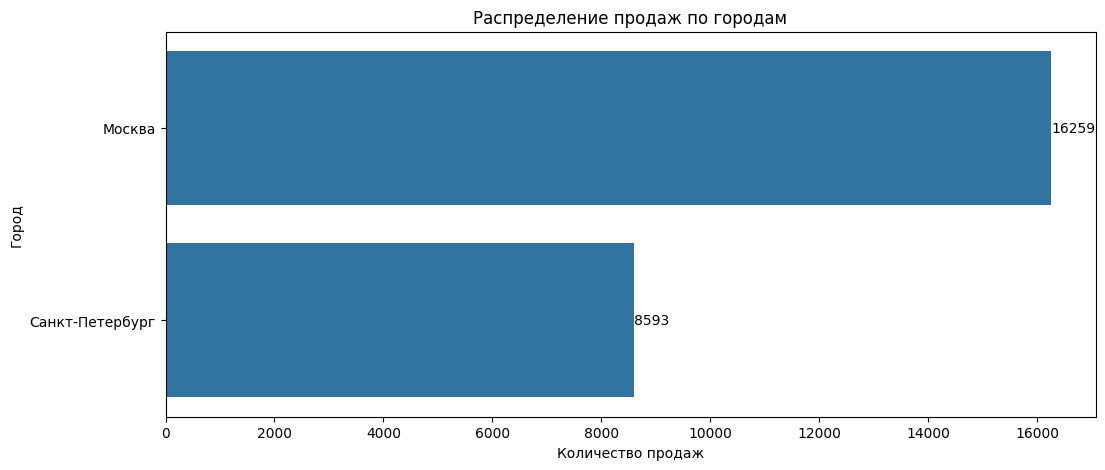

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(y=store_city.value_counts().index, x=store_city.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение продаж по городам')
plt.ylabel('Город')
plt.xlabel('Количество продаж')
plt.show()

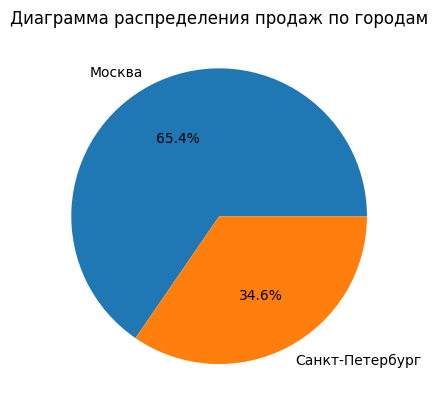

In [ ]:
plt.title('Диаграмма распределения продаж по городам')

plt.pie(store_city.value_counts().values, labels = store_city.value_counts().index, autopct='%.1f%%')
plt.show()

**Выводы:**
1. Количество уникальных значений по признаку городов составляет 2 шт (Москва и Санкт-Петербург).
2. В Москве количество продаж из общего числа  - 16259 шт, что составляет 65,4%.
3. В Санкт-Петербурге количество продаж  - 8593 шт, что составляет 34,6% от общего числа транзакций.





### sales_outlet_id

In [ ]:
sales_outlet_id = df_copy.sales_outlet_id
sales_outlet_id.describe()

count     24852
unique        3
top           3
freq       8593
Name: sales_outlet_id, dtype: int64

In [ ]:
sales_outlet_id.mode()

0    3
Name: sales_outlet_id, dtype: object

In [ ]:
sales_outlet_id.value_counts()

sales_outlet_id
3    8593
5    8545
8    7714
Name: count, dtype: int64

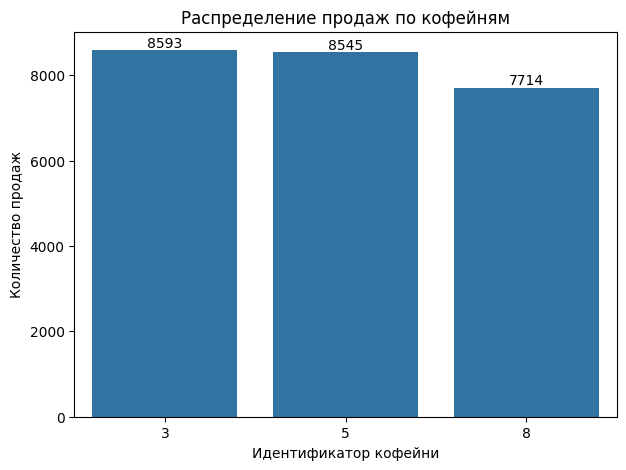

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.barplot(y=sales_outlet_id.value_counts().values, x=sales_outlet_id.value_counts().index)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение продаж по кофейням')
plt.ylabel('Количество продаж')
plt.xlabel('Идентификатор кофейни')
plt.show()

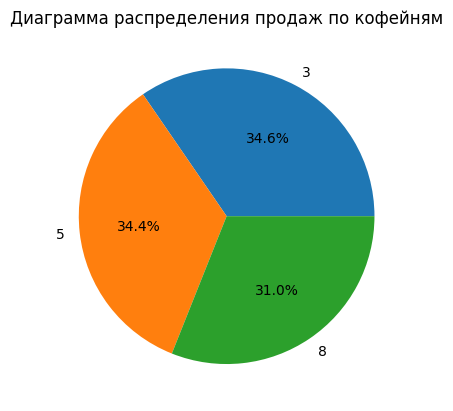

In [ ]:
plt.title('Диаграмма распределения продаж по кофейням')

plt.pie(sales_outlet_id.value_counts().values, labels = sales_outlet_id.value_counts().index, autopct='%.1f%%')
plt.show()

In [ ]:
df_copy.groupby('sales_outlet_id')['total'].describe()


count        mean         std   min    25%     50%    75%  \
sales_outlet_id                                                               
3                8593.0  292.695461  164.631092  52.0  195.0  243.75  390.0   
5                8545.0  304.775606  189.234271  52.0  195.0  243.75  390.0   
8                7714.0  301.602612  318.126947  52.0  195.0  243.75  390.0   

                     max  
sales_outlet_id           
3                 2925.0  
5                 2925.0  
8                23400.0

In [ ]:
sales_outlet_id_total = df_copy.groupby('sales_outlet_id')['total'].sum().sort_values(ascending=False)
sales_outlet_id_total

sales_outlet_id
5    2604307.55
3    2515132.10
8    2326562.55
Name: total, dtype: float64

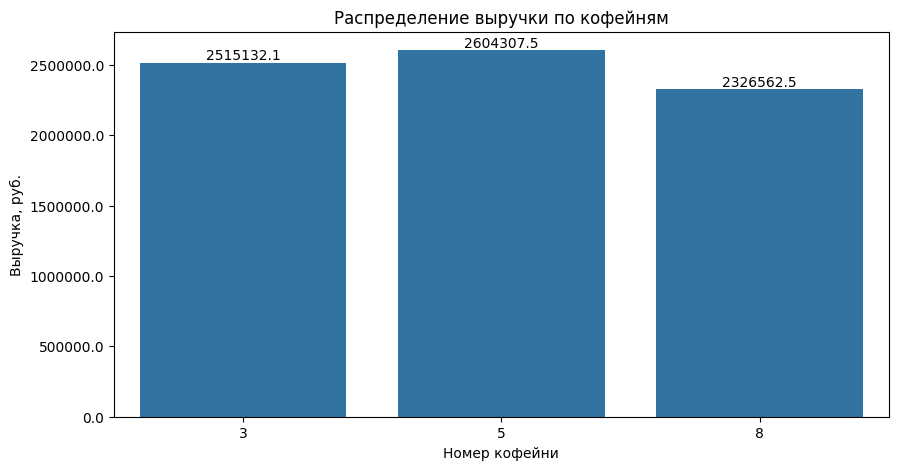

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(y=sales_outlet_id_total.values, x=sales_outlet_id_total.index)
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.1f' )
plt.title('Распределение выручки по кофейням')
plt.ylabel('Выручка, руб.')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel('Номер кофейни')
plt.show()

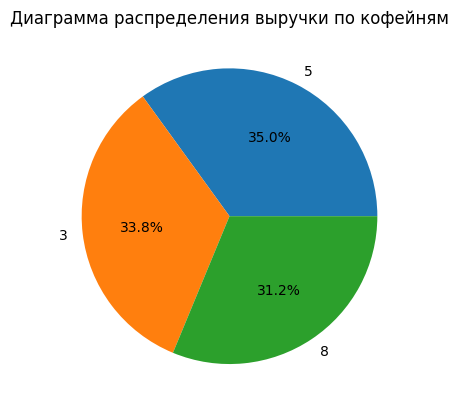

In [ ]:
plt.title('Диаграмма распределения выручки по кофейням')

plt.pie(sales_outlet_id_total.values, labels = sales_outlet_id_total.index, autopct='%.1f%%')
plt.show()

**Выводы:**
1. Количество уникальных значений по признаку идентификатор кофеен составляет 3 шт.
2. Из проедставленных в выборке кофеен продажи распределились следующим образом:
- кофейня №3 - 8593 продаж (34,6%);
- кофейня №5 - 8545 продаж (34,4%);
- кофейня №8 - 7714 продаж (31,0%);
3. Что касается влияния кофеен на общий объем продаж, можно сказать следующее:
* наибольшее влияние оказывыает кофейня №5 - 2 604 307 руб. (35%)
* чуть меньше объем продаж приносит кофейня №3 - 2 515 132 руб. (33,8%)
* самый наихудший показатель выручки в кофейне №8 - 2 326 562 руб.(31,2%)



# **4. Evaluation / Общие выводы и рекомендации**

***Аналитические цели***:
1. изучить продажи в разрезе категорий и типов продукции
2. изучить группы товаров с наилучшими и наихудшими показателями выручки
3. выявить кофейни с наибольшим влиянием на общий объем продаж

## **I. Общие выводы по датасету:**
1. Был представлен датасет с данными о транзакциях кофеен: файл в формате xlsx, содержащий 24852 строк (объектов) и 8 столбцов (признаков).
2. Предобработка данных не потребовалась.
3. В анализе использовалась выборка продаж за последние 6 месяцев.

## **II. Анализ продаж, выручки и кофеен**
**Анализ продаж в разрезе категорий и типов продукции**
1. Самая частопродаваемая категория товаров - "Coffee", встретилось 9948 раз.
2. Также в Топ-5 лидеров продаж входят категории товаров: Tea(7866 продаж), Bakery(3780 продаж), Drinking Chocolate(1955 продаж), Flavours(782 продажи).
3. Лидерство типов товаров занимает "Brewed Chai tea" - продано 2990 раз.
4. Что касается Топ-3 типов товаров, то его дополняют Gourmet brewed coffee - продано 2859 раз и Barista Espresso - продано 2765 раз.

**Анализ группы товаров с наилучшими и наихудшими показателями выручки**
1. Самый большой вклад в выручку приносит категория Coffee - 2 962 352 руб.
2. Чуть меньше приносит продажа категории Tea - 2 190 841 руб.
3. Самый наихудший показатель выручки в категории Packaged Chocolate - 37 792 руб.

**Анализ кофеен с наибольшим влиянием на общий объем продаж**
1. Из анализа представленных кофеен, можно сказать, что количество продаж по всем точкам практически одинаково, различия не значительны. Но всё-таки наибольшее влияние на общий объем продаж имеет кофейня с идентификатором №5 - 8593 продаж (что составило 34,6% от общего количества транзакций), которая находится в городе Москва.


## **III. Рекомендации:**
Исходя из проведенного анализа, можно составить такие рекомендации для Заказчика
1. Для расширения бизнеса, лучше выбрать город Москву, рассмотрев территориальную принадлежность кофейни №5.
2. Для активной продажи использовать категории "Coffee" и "Tea", а именно обратить снимание на типы продукции "Brewed Chai tea", "Gourmet brewed coffee", "Barista Espresso".
3. Рассматривая оптимизацию продаж, стоит отказаться от категории "Packaged Chocolate" и "Branded".
4. А также рассмотреть возможность исключкения из продаж таких типов продукции как "Organic Chocolate", "Clothing", "House blend Beans", "Green tea", "Green beans"
